In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
# 20-330
years = [f"{x:04d}" for x in range(0,3719)]
ii =0
result2 = np.zeros(3719)

for yy in years:
    data1=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/air500/TAUX300/CESM_TAU_'+yy+'_.nc')
    TAUX1 = data1.variables['TAUX'][0,80:280,-200:]
    TAUX2 = data1.variables['TAUX'][0,80:280,:120]
    TAUX = np.hstack((TAUX1,TAUX2))
    TT3 = np.mean(TAUX,axis=1)
    LAT = data1.variables['lat'][80:280]
    #result2[ii] = LAT[np.where(TT3<0)[0][0]]
    #result2[ii] = LAT[np.where(TT3[:,:] == np.nanmin(TT3[:,:]))[0][0]]
    result2[ii] = LAT[np.where(TT3[:] == np.nanmin(TT3[:]))]
    ii = ii + 1

In [3]:
years = [f"{x:04d}" for x in range(0,96)]
ii =0
result5 = np.zeros(96)
# here PSL is TAUX !!!!!!!
for yy in years:
    data1=nc.Dataset('/scratch/user/xiliangdiao/firstpaper/TAUX/CESM_PSL_'+yy+'_.nc')
    TAUX1 = data1.variables['PSL'][0,80:280,-200:]
    TAUX2 = data1.variables['PSL'][0,80:280,:120]
    TAUX = np.hstack((TAUX1,TAUX2))
    TT5 = np.mean(TAUX,axis=1)
    LAT = data1.variables['lat'][80:280]
    #result5[ii] = LAT[np.where(TT3<0)[0][0]]
    #result5[ii] = LAT[np.where(TAUX[:,:] == np.nanmin(TAUX[:,:]))[0][0]]
    result5[ii] = LAT[np.where(TT5[:] == np.nanmin(TT5[:]))]
    ii = ii + 1

In [4]:
#####air 340-500.out

years = [f"{x:04d}" for x in range(0,1955)]
ii =0
result = np.zeros(1955)

for yy in years:
    data1=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/air500/TAUX/CESM_TAU_'+yy+'_.nc')
    TAUX1 = data1.variables['TAUX'][0,80:280,-200:]
    TAUX2 = data1.variables['TAUX'][0,80:280,:120] # choose the data for the region of (40S~70S,50W~30E)
    TAUX = np.hstack((TAUX1,TAUX2))
    TT2 = np.mean(TAUX,axis=1)  # average for (50W~30E)
    LAT = data1.variables['lat'][80:280]
    result[ii] = LAT[np.where(TT2[:] == np.nanmin(TT2[:]))] # find out the biggest TAUX (due to direction, it is negative)
    ii = ii + 1

In [6]:
hh = np.hstack((result2,result5))
hh2 = np.hstack((hh,result))

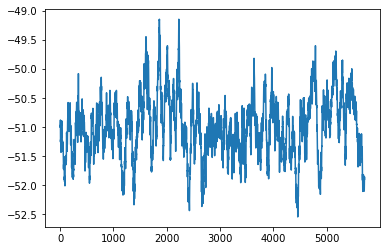

In [7]:
ww222 = np.convolve(hh2, np.ones((60,))/60, mode='valid')
mean = np.nanmean(ww222)
plt.plot(ww222)